# Exploratory Data Analysis
This dataset contains EEG recordings of 22 pediatric subjects with intractable seizures. In all, the onsets and ends of 182 seizures are annotated. Due to the nature of this data, I will create binary classification models that predict whether or not a patient is having a seizure.

There are many hours of EEG data within this dataset. This may seem like a lot of data on which to train, but at the same time, the target classes will be HEAVILY skewed towards 0 (no seizure). This is a problem known as **Class Imbalance** and can lead to creating biased models.

### Goals for EDA:
- Graph/plot a snippet of an EEG recording
- Convert an EEG recording to a spectrogram. relearn digital signal processing techniques and gain comfort/familiarity with manipulating the data
- Bandpass filter the data. Learn domain-specific knowledge on which frequencies to bandpass/keep.
- Create a list of features that can be extracted from the data. Understand the features.
- Decide what features to use for a model

### Basic Analysis
- Sampling rate: 256Hz
- highest frequency we'll see is 128 bc that's half of the sampling rate... see nyquist's theorem
- Channels: 23 (i.e. the recording method had 23 sensors)
- Total Recordings: 686
- Recordings with at least 1 seizure: 142


In [17]:
import warnings

import mne

In [9]:
# count total recordings
records_file = '../data/RECORDS'
records = list()
with open(records_file, 'r') as file:
    for line in file:
        records.append(line.strip())
print(f'Total Recordings: {len(records)}')

# count total seizures
seizure_records_file = '../data/RECORDS-WITH-SEIZURES'
seizure_records = list()
with open(seizure_records_file, 'r') as file:
    for line in file:
        seizure_records.append(line.strip())
print(f'Recordings with at least 1 seizure: {len(seizure_records)}')

Total Recordings: 686
Recordings with at least 1 seizure: 142


In [22]:
# Get total time overall
with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    total_time = 0
    for record in records:
        raw = mne.io.read_raw_edf(f'../data/{record}', verbose=False)
        duration = raw.n_times / raw.info['sfreq']  # total_samples / Hz => total_samples / samples_per_second => seconds
        total_time += duration
    print(f'Total Recording Time: {total_time/60/60:.2f} Hours')
    # get total seizure time
    # seizure_time = 0
    # for record in seizure_records:
    #     raw = mne.io.read_raw_edf(f'../data/{record}.seizure', verbose=False)
    #     duration = raw.n_times / raw.info['sfreq']  # total_samples / Hz => total_samples / samples_per_second => seconds
    #     seizure_time += duration
    # print(f'Total Seizure Time: {seizure_time:.2f}s')
    # print(f'% Seizure: {(seizure_time/total_time)*100:.2f}%')

Total Recording Time: 982.94 Hours


Extracting EDF parameters from /home/kimbo/github-repos/chb-mit-scalp-eeg/data/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using matplotlib as 2D backend.


/tmp/ipykernel_153312/3423006012.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('../data/chb01/chb01_01.edf')


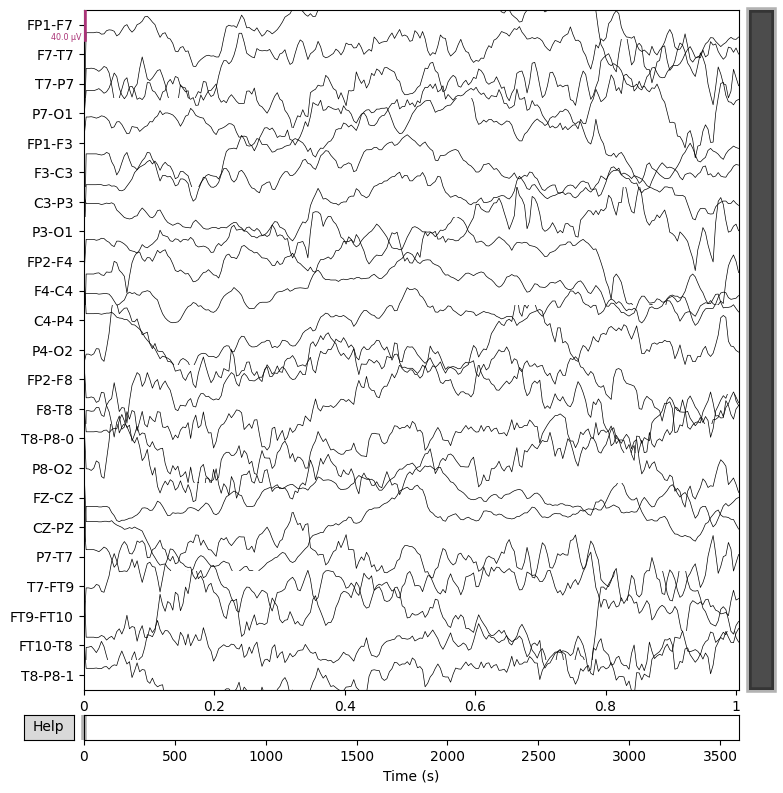

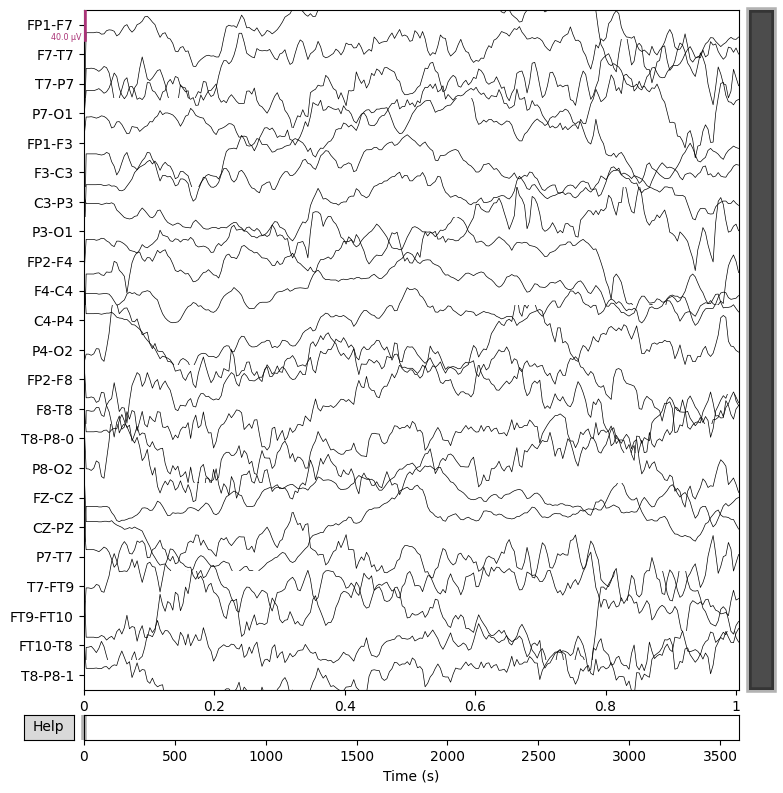

In [2]:
# grab a random eeg and plot it
raw = mne.io.read_raw_edf('../data/chb01/chb01_01.edf')
# print(raw.info)   # print the metadata
raw.plot(duration=1, n_channels=23)        # 1 second of data from all channels

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_2433388/3894280210.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=128).plot()  # max freq at 128 bc data has already been 'cleaned' w a lowpass at 128


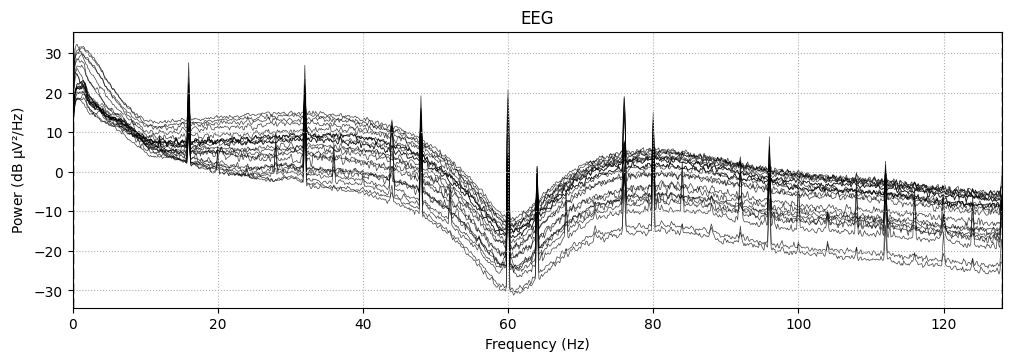

In [17]:
# Plot a PSD graph to see where power is localized
raw.compute_psd(fmax=128).plot()  # max freq at 128 bc that's half of the sampling rate.. see nyquist's theorem